In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
iris = pd.read_csv("/content/sample_data/iris.csv")


In [4]:
iris.head()

,SL,SW,PL,PW,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SL      150 non-null    float64
 1   SW      150 non-null    float64
 2   PL      150 non-null    float64
 3   PW      150 non-null    float64
 4   target  150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


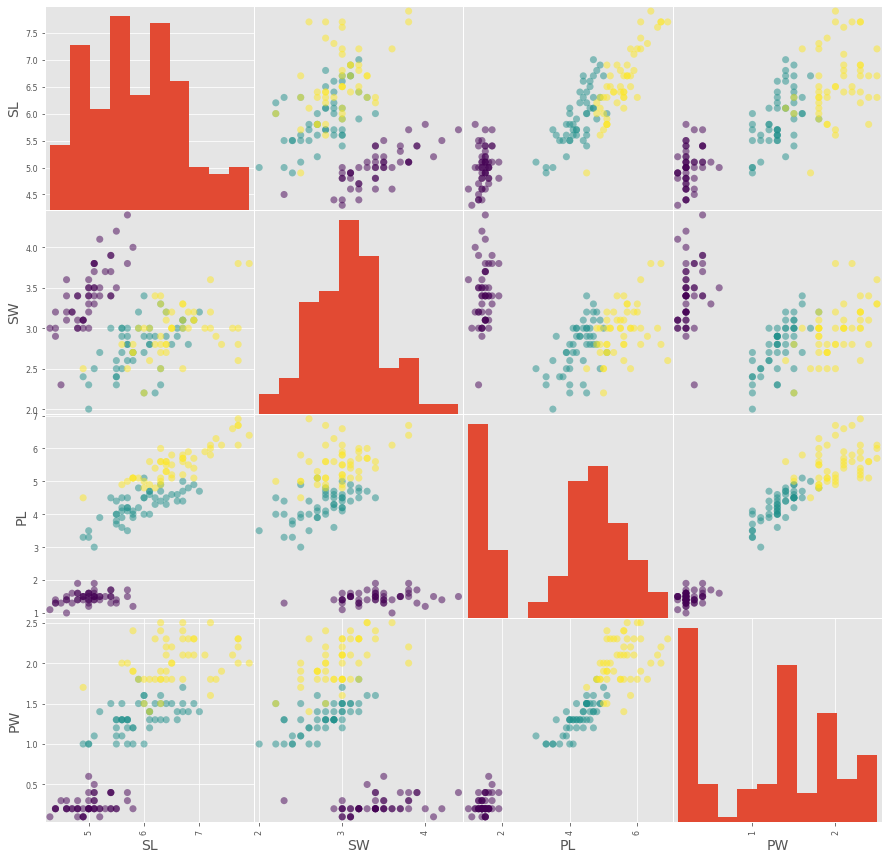

In [6]:
from pandas.plotting import scatter_matrix

data = iris.iloc[:, :4]
species = iris.iloc[:, 4]

scatter_matrix(data, c = species, figsize=[15, 15],
               s=50, marker='o');

In [7]:
X = iris.iloc[:, [3]].values # petal width
y = (iris.iloc[:, 4]).astype(np.int)

In [10]:
X.shape

(150, 1)

In [11]:
y.shape

(150,)

### Softmax Regression

In [13]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
log_reg.predict([[0.2]])

array([0])

In [15]:
log_reg.predict_proba([[0.2]])

array([[9.89467604e-01, 1.05323625e-02, 3.33929155e-08]])

In [17]:
y_pred = log_reg.predict(X)

In [18]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y, y_pred)
cnf_matrix

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  4, 46]])

In [ ]:
result = confusion_matrix(y, y_pred)

print("True Negative : " + str(result[0,0]))
print("False Negative: " + str(result[1,0]))
print("False Positive: " + str(result[0,1]))
print("True Positive : " + str(result[1,1]))

True Negative : 50
False Negative: 0
False Positive: 0
True Positive : 48


In [19]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score, f1_score

print("Accuracy after CV :", accuracy_score(y, y_pred))
print("Pricision after CV:", precision_score(y, y_pred, average='weighted'))
print("Recall after CV   :", recall_score(y, y_pred, average='weighted'))
print("f1_score after CV :", f1_score(y, y_pred, average='weighted'))

Accuracy after CV : 0.96
Pricision after CV: 0.9604700854700855
Recall after CV   : 0.96
f1_score after CV : 0.9599839935974391
